# Week 9a: Line and Surface Integrals of Scalar Functions

Demo by Christian Mikkelstrup, Hans Henrik Hermansen, Jakob Lemvig, Karl Johan Måstrup Kristensen, and Magnus Troen

In [1]:
from sympy import *
from dtumathtools import*
init_printing()
x,y,z = symbols('x y z', real=True)

## Curve Lengths

We are given a parameter curve,

In [2]:
u,v = symbols('u v', real=True)
r = Matrix([sin(u), sin(u)*cos(u)])
r

⎡   sin(u)    ⎤
⎢             ⎥
⎣sin(u)⋅cos(u)⎦

where $u \in [0, 2\pi]$.

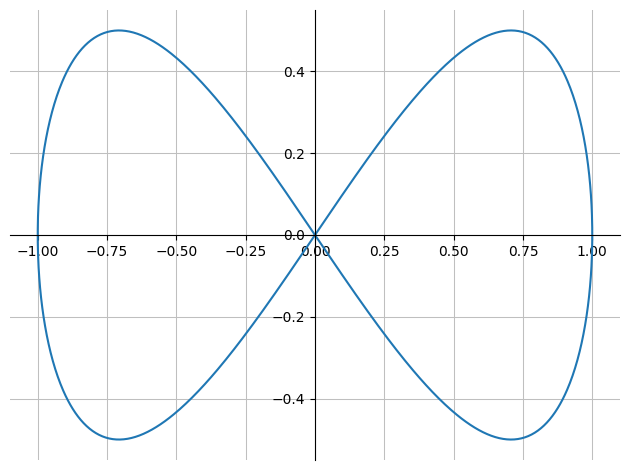

In [3]:
p_curve = dtuplot.plot_parametric(*r, (u,0,2*pi), use_cm=False, label="r(u)",axis_center="auto")

### Tangent Vector and Tangent

We find the tangent vector,

In [4]:
dr = r.diff(u)
dr

⎡      cos(u)       ⎤
⎢                   ⎥
⎢     2         2   ⎥
⎣- sin (u) + cos (u)⎦

We now find the parametric representation for the tangent corresponding to the curve point $r(\pi/3)$,

In [5]:
t = symbols("t")
r_tan = r.subs(u,pi/3) + t*dr.subs(u,pi/3)
r_tan

⎡ t   √3 ⎤
⎢ ─ + ── ⎥
⎢ 2   2  ⎥
⎢        ⎥
⎢  t   √3⎥
⎢- ─ + ──⎥
⎣  2   4 ⎦

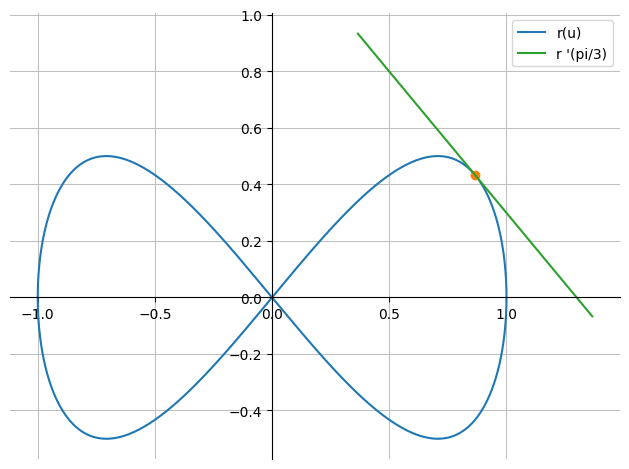

In [6]:
p_point = dtuplot.scatter(r.subs(u,pi/3), show=False)
p_tan = dtuplot.plot_parametric(*r_tan, (t,-1,1), use_cm=False, label="r '(pi/3)", show=False)


(p_curve + p_point + p_tan).show()

### Length of the Curve

And then the length of this curve can be found by

\begin{equation*}
  \int_K\; \mathrm{d}\pmb{s} = \int_{0}^{2\pi} \Vert r'(u) \Vert \mathrm{d}u
\end{equation*}

In [7]:
Jacobian = dtutools.l2_norm(dr)
integrate(Jacobian, (u,0,2*pi)).n()

## Line Integral in 3D space

We are given a function:

In [8]:
x,y,z = symbols("x y z")
f = lambda x,y,z: sqrt(x**2 + y**2 + z**2)
f(x,y,z)

and a parameter curve (a so-called space curve)

In [9]:
r = Matrix([u*cos(u), u*sin(u), u])
r

⎡u⋅cos(u)⎤
⎢        ⎥
⎢u⋅sin(u)⎥
⎢        ⎥
⎣   u    ⎦

for $u\in[0,5]$.

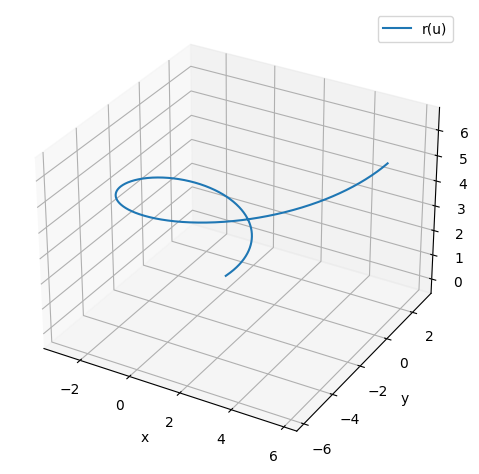

In [10]:
p_spacecurve = dtuplot.plot3d_parametric_line(*r, (u,0,2*pi), use_cm=False, label="r(u)",aspect="equal", legend=True)

The restriction of the function to the curve is:

In [11]:
restriction = f(*r).simplify()
restriction

and if one remembers that $u$ is positive, since we have defined $u\in [0, 5]$, then the absolute value is irrelevant. From the definitions of our `u` and `v` we do though have them defined by

```python
u,v = symbols('u v', real=True)
```

where SymPy only takes into account the assumption that $u=|u|$ in exactly this case. If we had defined them using

```python
u,v = symbols('u v', real=True, nonnegative=True)
```

instead, we could have used $\verb|refine()|$ and $\verb|Q.|\textit{assumption}\verb|(symbol)|$, where _assumption_ can be replaced by the entries in [this table](https://docs.sympy.org/latest/guides/assumptions.html#id28). 

We shall here use $\verb|Q.nonnegative()|$, and then SymPy shows that **the restriction** in fact is

In [12]:
true_restriction = refine(restriction, Q.nonnegative(u)) # Q.nonnegative(u) tells refine() that u >= 0
true_restriction

for $u \in [0,5]$. Whether we write $u$ or $|u|$ in the expression can sometimes make a difference if SymPy tries to integrate it.

Let's return to the line integral that we wish to compute: $\int_K f(x,y,z)\, \mathrm{d}\pmb{s}$.

First, we find the tangent vector,

In [13]:
dr = r.diff(u)
dr

⎡-u⋅sin(u) + cos(u)⎤
⎢                  ⎥
⎢u⋅cos(u) + sin(u) ⎥
⎢                  ⎥
⎣        1         ⎦

The length of the tangent vector $||r_u'(u)||$ is equal to the Jacobian,

In [14]:
Jacobian = dtutools.l2_norm(dr).simplify()

# The following lines only works if $u$ is a real variable
# meaning if 'u = symbols('u', real=True)':
# Jacobian = dr.norm()

Jacobian

We can now find **the integral along the curve**,

In [15]:
integrate( f(*r) * Jacobian ,(u,0,5)).evalf()

and **the length of the curve**,

In [16]:
integrate(Jacobian,(u,0,5)).evalf()

## Integral over Cylinder Surface in $\mathbb{R}^3$

We consider a function $f: \mathbb{R}^3 \to \mathbb{R}$ given by

\begin{equation*}
f(x,y,z) = 8 z.
\end{equation*}

We also consider a surface given by the following parametric representation with $u \in [0,\frac{\pi}{2}]$ and $v \in [0,1]$:

In [17]:
# This time we remember 'nonnegative=True', since we again see that
# none of the intervals for u and v contain negative numbers
u,v = symbols('u v', real=True, nonnegative=True)
r = Matrix([u*cos(u),u*sin(u),u*v])

def f(x,y,z):
    return 8*z

r, f(x,y,z)

⎛⎡u⋅cos(u)⎤     ⎞
⎜⎢        ⎥     ⎟
⎜⎢u⋅sin(u)⎥, 8⋅z⎟
⎜⎢        ⎥     ⎟
⎝⎣  u⋅v   ⎦     ⎠

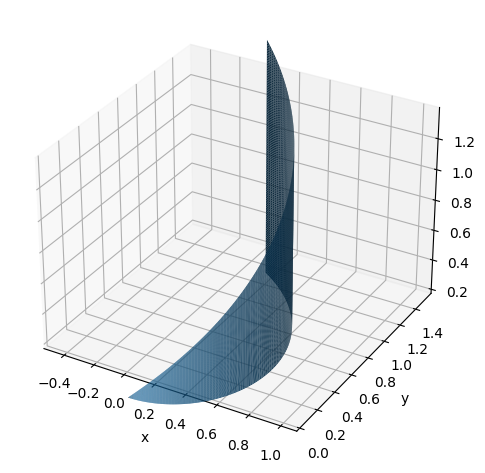

In [18]:
dtuplot.plot3d_parametric_surface(*r,(u,0,pi/2),(v,0,1), aspect='equal')

### _Side Note: Interactive 3D plots_

**Note:** This is not needed. Personally, though, we think that it is nice to be able to turn and rotate 3D plots, and have a better overview over what is happening in the plot.

**Second note:** Apart from that, one also must be aware that one's notebook cannot be exported to PDF, if one has plots of this type in the document. There are work-arounds for this, but do consider whether you want to spend time on figuring it out.

If one wants to be able to move a 3D plot in order to achieve a better sense of the plot, it is an option to use another `backend` when plotting. This does though require that one installs the package `plotly` with pip:

```
pip install plotly
```

Or by removing the commenting from the cell below and execute it a single time. Then `plotly` will be installed in the version of Python that your notebook is using right now.

In [19]:
# ! pip install plotly

In [20]:
#                                                                           vvvvvvvvvvvvvvvvvv  her
# dtuplot.plot3d_parametric_surface(*r,(u,0,pi/2),(v,0,1), aspect='equal', backend=dtuplot.PB, use_cm=True)

### The Jacobian of a Surface in 3D

We find the Jacobian and insert the parametric representation in $f$:

In [21]:
crossproduct = r.diff(u).cross(r.diff(v))
Jacobian = sqrt((crossproduct.T * crossproduct)[0]).simplify()
Jacobian

In [22]:
integrand = f(*r) * Jacobian
integrand

In [23]:
integrate(integrand,(v,0,1),(u,0,pi/2)).evalf()